In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("D:\Py Django\DataScience\Regression\Linear Regression\Multiple Linear\students.csv")
df

,Study_Hours,Attendance,Assignments_Completed,Department,Gender,Final_Score
0,4.37,84.91,12,Arts,Male,66.44
1,9.56,76.80,7,Commerce,Male,85.36
2,7.59,65.48,12,Science,Female,96.36
3,6.39,90.69,9,Science,Male,86.04
4,2.40,84.24,5,Arts,Female,46.09
...,...,...,...,...,...,...
495,4.18,54.58,9,Commerce,Female,68.00
496,6.25,95.87,8,Arts,Female,77.89
497,1.70,56.84,14,Science,Male,67.33
498,9.77,97.51,5,Commerce,Female,95.77


In [3]:
Department = LabelEncoder()
Gender = LabelEncoder()

df['Department'] = Department.fit_transform(df['Department'])
df['Gender'] = Gender.fit_transform(df['Gender'])

In [4]:
x = df.drop("Final_Score",axis = 1)
y = df["Final_Score"]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

In [6]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_pred = model.predict(x_test)
y_pred

array([ 77.6810896 ,  96.2504901 ,  95.96222976,  84.64067682,
        71.15960543,  87.43741816,  55.016111  ,  58.81727025,
       104.30426124,  76.71638255,  89.31353358,  96.65125315,
        70.2636437 ,  46.01350072,  77.28380726,  85.46134392,
        44.62741118,  96.53534788,  73.861493  , 109.5443753 ,
        79.29641273,  91.55983993,  82.8072806 ,  53.03524318,
        82.89209566,  62.05305476,  64.1807371 ,  89.17040035,
        44.25740482,  74.42225587,  67.18769075,  99.60922782,
        78.12663688,  83.39972178,  56.86899019,  55.77157791,
        87.90624269,  70.27037483,  77.25292529,  72.55816087,
        62.40692735,  66.89964996,  58.22359773,  63.55145835,
        92.83610566,  69.63108659,  75.19797297,  61.23129092,
        49.85661821,  76.62272421,  66.49039403,  59.41102654,
        75.32482075,  78.11307146,  36.56182715,  91.10543522,
        60.39526763,  67.16847814,  71.52265226,  80.89631158,
        86.44388946,  77.98860727,  80.402919  ,  68.38

In [8]:
mse = mean_squared_error(y_pred,y_test)
mse

root = np.sqrt(mse)
root

r_mse = r2_score(y_test, y_pred)
r_mse

0.9206815723235175

c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Final Score for new student: 94.44


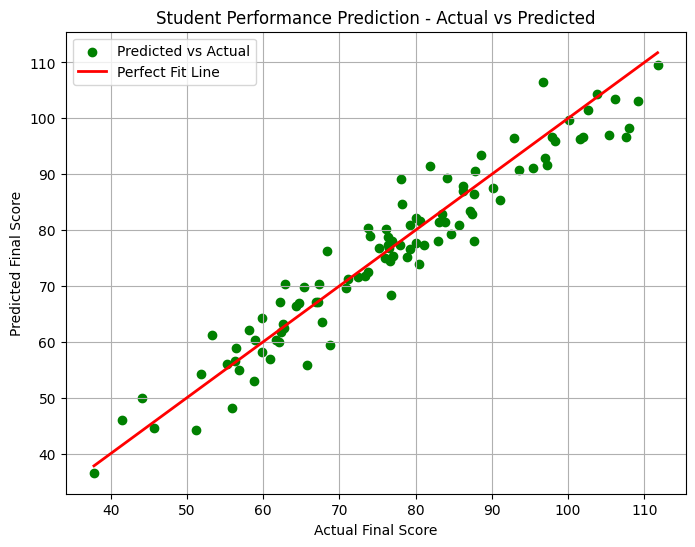

In [9]:
new_department = Department.transform(['Science'])[0]
new_gender = Gender.transform(['Female'])[0]

new_data = [[7, 85, 10, new_department, new_gender]]
predicted_score = model.predict(new_data)[0]
print(f"Predicted Final Score for new student: {predicted_score:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],color='red', linewidth=2, label='Perfect Fit Line')

plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Student Performance Prediction - Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()